In [1]:
from bggcomplex import *
from lie_algebra_module import *
import numpy as np
from collections import Counter

In [2]:
BGG = BGGComplex("A3")
BGG.find_cycles();

In [4]:
Solver = BGGMapSolver(BGG,BGG.zero_root)

In [5]:
Solver.solve(parallel=False);

In [6]:
print(Solver.timer)

{'index': 0.0016660690307617188, 'vect': 0.012651443481445312, 'basis': 0.014249801635742188, 'mult': 0.014755487442016602, 'linalg': 0.7994282245635986}


In [7]:
Solver.check_maps()

checked 126 cycles, with no problems found!


In [8]:
BGG.compute_signs()

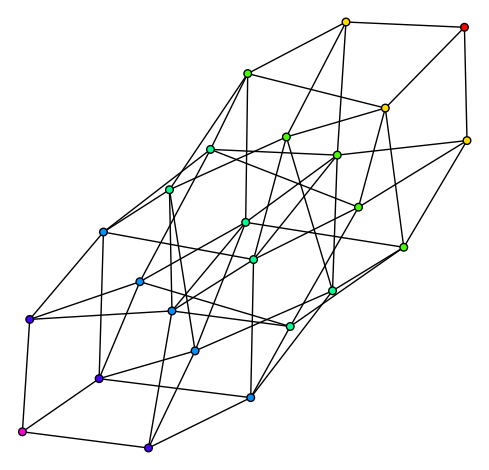

In [9]:
BGG.plot_graph().plot()

In [10]:
roots=BGG.W.domain().simple_roots()
roots

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [11]:
dom = BGG.W.domain()
cr= dom.coroot_lattice()

In [12]:
fun=dom.fundamental_weights_from_simple_roots()
fun

Finite family {1: (3/4, -1/4, -1/4, -1/4),  2: (1/2, 1/2, -1/2, -1/2),  3: (1/4, 1/4, 1/4, -3/4)}

In [13]:
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [14]:
[BGG._weight_to_tuple(r) for r in fun.values()]

[[3/4, 1/2, 1/4], [1/2, 1, 1/2], [1/4, 1/2, 3/4]]

In [15]:
dom = BGG.W.domain()
dom.simple_coroots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [16]:
dom.simple_roots()

Finite family {1: (1, -1, 0, 0), 2: (0, 1, -1, 0), 3: (0, 0, 1, -1)}

In [17]:
BGG._tuple_to_weight([1,1,1/2])

(1, 0, -1/2, -1/2)

In [18]:
mu=fun[1]

In [19]:
mu = BGG.zero_root

In [20]:
[BGG._tuple_to_weight(BGG.dot_action(w,mu))-mu for w in BGG.W]

[(0, 0, 0, 0),
 (0, 0, -1, 1),
 (0, -1, -1, 2),
 (-1, -1, -1, 3),
 (0, -1, 1, 0),
 (0, -2, 1, 1),
 (0, -2, 0, 2),
 (-1, -2, 0, 3),
 (-1, -1, 2, 0),
 (-1, -2, 2, 1),
 (-2, -2, 2, 2),
 (-2, -2, 1, 3),
 (-1, 1, 0, 0),
 (-1, 1, -1, 1),
 (-2, 1, -1, 2),
 (-2, 0, -1, 3),
 (-2, 1, 1, 0),
 (-3, 1, 1, 1),
 (-3, 1, 0, 2),
 (-3, 0, 0, 3),
 (-2, 0, 2, 0),
 (-3, 0, 2, 1),
 (-3, -1, 2, 2),
 (-3, -1, 1, 3)]

In [21]:
def is_dot_regular(mu):
    stab_counter = 0
    for w in BGG.W:
        if w.action(mu+BGG.rho)-BGG.rho==mu:
            stab_counter+=1
    if stab_counter<=1:
        return True
    else:
        return False

In [22]:
(BGG.rho-fun[1]).is_dominant()

True

In [23]:
mu=(5*BGG.simple_roots[1]+6*BGG.simple_roots[2]+5*BGG.simple_roots[3])
print(mu.is_dominant())
print(BGG.is_dot_regular(mu))

IndexError: list index out of range

In [ ]:
BGG.make_dominant(mu)

In [ ]:
e = list(BGG.LA.basis())[0]
f = list(BGG.LA.basis())[1]
e

In [ ]:
BGG.PBW_alg_gens
BGG.LA.basis()
pbw_to_la={str(value):BGG.LA.basis()[key] for key,value in dict(BGG.PBW_alg_gens).items()}
pbw_to_la

In [ ]:
#for e in BGG.LA.basis():
#    result=0
#    for term,coefficient in elt:
#        sub_result=e
#        for factor,power in term:
#            for _ in range(power):
#                sub_result=BGG.LA.bracket(pbw_to_la[str(factor)],sub_result)
#        result+=sub_result
#    print(e,result)

In [ ]:
def universal_enveloping_algebra_action(pbw_elt,e):
    result=0
    for term,coefficient in pbw_elt:
            sub_result=e
            for factor,power in term:
                for _ in range(power):
                    sub_result=BGG.LA.bracket(factor,sub_result)
            result+=sub_result
    return result

We want to implement the $U(\mathfrak g)$ action on the module
$$
    M_i^j=\bigoplus{}_{r=0}^{j+\frac k2}\left(\left(\bigodot{}^{j+\frac k2-r}\mathfrak u \right)\otimes\left(\bigwedge^r\mathfrak g\right)\otimes\left(\bigwedge{}^{j+\frac k2}\mathfrak n \right) \right)
$$
For this we need two things, one is finding a basis of this module, and second we define the action on it. Unfortunately I can't find a good out of the box implementation for either of these, so we are going to have to do it ourselves. Ideally we can use this to extend sage a little bit. 

Sagemath has a class FreeModuleTensor, it can deal with alternating and symmetric tensors. But it specifically says it can not deal with tensor products of different modules, whereas that is precisely what we need. We should investigate how this class work, and extend it with this functionality. Besides, that module seems to focus on doing stuff without a specific basis. We want to do everything in a basis, because the whole point is to compute a basis. 

We should make an instance of CombinatorialFreeModule

In [ ]:
{tuple(a):a for a in BGG.LA.basis().keys()}

In [ ]:
 BGG.W.domain().roots()

In [ ]:
def root_dict_to_string(root_dict):
    return ''.join(''.join([str(k)]*abs(v)) for k,v in root_dict.items())

string_to_root = {}
for i,b in dict(BGG.lattice.alphacheck()).items():
    string_to_root['h%d'%i]=b
for a in BGG.lattice.negative_roots():
    key = 'f'+root_dict_to_string(a.monomial_coefficients())
    string_to_root[key]=a 
for a in BGG.lattice.positive_roots():
    key = 'e'+root_dict_to_string(a.monomial_coefficients())
    string_to_root[key]=a  

root_to_string = {r:i for i,r in string_to_root.items()}
string_to_root

In [ ]:
gbasis_dict = {str(i):r for i,r in enumerate(BGG.LA.basis().keys())}
root_to_index = {r:i for i,r in gbasis_dict.items()}
root_to_index

In [ ]:
dom = BGG.W.domain()
dom.positive_roots()

# Lie algebra modules

In [3]:
factory = LieAlgebraModuleFactory(BGG.LA)
M1=factory.construct_module(subalgebra='n')
M2=factory.construct_module(subalgebra='b')
M3 = M1.alternating_power(3)

In [4]:
LieAlgebraModule.direct_sum(M1.alternating_power(3),M2.symmetric_power(3))

Free module generated by {f1∧f12∧f123, f1∧f12∧f2, f1∧f12∧f23, f1∧f12∧f3, f1∧f123∧f2, f1∧f123∧f23, f1∧f123∧f3, f1∧f2∧f23, f1∧f2∧f3, f1∧f23∧f3, f12∧f123∧f2, f12∧f123∧f23, f12∧f123∧f3, f12∧f2∧f23, f12∧f2∧f3, f12∧f23∧f3, f123∧f2∧f23, f123∧f2∧f3, f123∧f23∧f3, f2∧f23∧f3, f1⊙f1⊙f1, f1⊙f1⊙f12, f1⊙f1⊙f123, f1⊙f1⊙f2, f1⊙f1⊙f23, f1⊙f1⊙f3, f1⊙f1⊙h1, f1⊙f1⊙h2, f1⊙f1⊙h3, f1⊙f12⊙f12, f1⊙f12⊙f123, f1⊙f12⊙f2, f1⊙f12⊙f23, f1⊙f12⊙f3, f1⊙f12⊙h1, f1⊙f12⊙h2, f1⊙f12⊙h3, f1⊙f123⊙f123, f1⊙f123⊙f2, f1⊙f123⊙f23, f1⊙f123⊙f3, f1⊙f123⊙h1, f1⊙f123⊙h2, f1⊙f123⊙h3, f1⊙f2⊙f2, f1⊙f2⊙f23, f1⊙f2⊙f3, f1⊙f2⊙h1, f1⊙f2⊙h2, f1⊙f2⊙h3, f1⊙f23⊙f23, f1⊙f23⊙f3, f1⊙f23⊙h1, f1⊙f23⊙h2, f1⊙f23⊙h3, f1⊙f3⊙f3, f1⊙f3⊙h1, f1⊙f3⊙h2, f1⊙f3⊙h3, f1⊙h1⊙h1, f1⊙h1⊙h2, f1⊙h1⊙h3, f1⊙h2⊙h2, f1⊙h2⊙h3, f1⊙h3⊙h3, f12⊙f12⊙f12, f12⊙f12⊙f123, f12⊙f12⊙f2, f12⊙f12⊙f23, f12⊙f12⊙f3, f12⊙f12⊙h1, f12⊙f12⊙h2, f12⊙f12⊙h3, f12⊙f123⊙f123, f12⊙f123⊙f2, f12⊙f123⊙f23, f12⊙f123⊙f3, f12⊙f123⊙h1, f12⊙f123⊙h2, f12⊙f123⊙h3, f12⊙f2⊙f2, f12⊙f2⊙f23, f12⊙f2⊙f3, f12⊙f2⊙h1, f12⊙f

Next steps:
- (restricted) coadjoint action
- compute dot regular weights
- take quotients by subspaces
- attach it to BGG complex, compute (co)kernel dimensions

In [5]:
maps = BGG.compute_maps(BGG.zero_root)

In [6]:
pbw_elt = maps.values()[38]

In [7]:
[M3.pbw_action(pbw_elt, m_elt) for pbw_elt in maps.values() for m_elt in M3.basis()]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 -2*f1∧f12∧f123,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -2*f12∧f123∧f3,
 0,
 0,
 0,
 -3*f1∧f12∧f123,
 0,
 0,
 0,
 f12∧f123∧f2,
 f1∧f12∧f23+3*f1∧f123∧f2,
 f12∧f123∧f3+2*f1∧f123∧f23,
 0,
 0,
 0,
 0,
 3*f12∧f123∧f2,
 2*f12∧f123∧f23,
 0,
 f12∧f123∧f23,
 0,
 -2*f123∧f2∧f23,
 0,
 -2*f1∧f123∧f23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -2*f123∧f23∧f3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 f1∧f12∧f23+f1∧f123∧f2,
 f1∧f123∧f23,
 f1∧f123∧f3,
 f1∧f123∧f23,
 0,
 0,
 0,
 f1∧f23∧f3,
 0,
 f12∧f123∧f23,
 0,
 0,
 f123∧f2∧f23,
 f12∧f23∧f3+f123∧f2∧f3,
 f123∧f23∧f3,
 0,
 f123∧f23∧f3,
 0,
 0,
 0,
 0,
 0,
 -2*f1∧f12∧f123,
 0,
 0,
 0,
 f12∧f123∧f2,
 f1∧f12∧f23+2*f1∧f123∧f2,
 f12∧f123∧f3+f1∧f123∧f23,
 0,
 0,
 0,
 0,
 2*f12∧f123∧f2,
 f12∧f123∧f23,
 0,
 f12∧f123∧f23,
 0,
 f123∧f2∧f23,
 0,
 0,
 0,
 2*f1∧f12∧f123,
 0,
 0,
 0,
 f12∧f123∧f2,
 f1∧f12∧f23-2*f1∧f123∧f2,
 f12∧f123∧f3-3*f1∧f123∧f23,
 0,
 0,
 0,
 

### Definition of coadjoint action

We have a pairing $\langle\,\,,\,\rangle$ on $\mathfrak g$. We also have a map on the root space, ${}^*$ sending:
$e_I \leftrightarrow f_I$, $h_i\leftrightarrow h_i$. Then the coadjoint action, corestricted to a subalgebra $\mathfrak i<\mathfrak g$ with basis $\{\alpha_i\}$,
$$
 \left.\mathrm{ad}^*\right|_{\mathfrak{i}}(X)(m) =- \sum_i\langle m,\,[X,\alpha_i^*] \rangle\alpha_i
$$
The pairing is defined by $\langle e_I,f_I\rangle=\delta_{i,j}$ and $\langle h_i,h_j\rangle=\delta_{i,j}$. We also define
$$
\varphi:\mathfrak b\to\mathfrak n\otimes\mathfrak u,\quad \varphi(m)=\sum_I f_I\otimes \left.\mathrm{ad}^*\right|_{\mathfrak{u}}(m)(e_I)
$$

In [17]:
dual_root_map = dict()
for root in factory.e_roots+factory.f_roots:
    dual_root_map[factory.root_to_string[-root]]=factory.root_to_string[root]
for root in factory.h_roots:
    dual_root_map[factory.root_to_string[root]]=factory.root_to_string[root]
dual_root_map
def pairing(X,Y):
    return sum(c1*c2 for x1,c1 in X.items() for x2,c2 in Y.items()if x1==dual_root_map[x2])

def coadjoint_action(X,m,basis):
    output = dict()
    for alpha in basis:
        alpha_dual = factory.string_to_lie_algebra(dual_root_map[alpha])
        bracket = factory.lie_algebra.bracket(X,alpha_dual)
        bracket = factory.lie_alg_to_module_basis(bracket)
        inn_product = pairing(bracket,{m:1})
        if inn_product!=0:
            output[alpha]=-inn_product
    return output

In [12]:
coadjoint_action(factory.lie_algebra.an_element(),'e1',factory.basis['g'])

{'e1': 1, 'e12': 1, 'h1': -2, 'h2': 1}

In [13]:
factory.adjoint_action(factory.lie_algebra.an_element(),"e1")

Counter({'e12': 1, 'e1': 1, 'h1': -1})

In [14]:
%timeit factory.string_to_lie_algebra('e1')

10000 loops, best of 3: 29.4 µs per loop
